In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

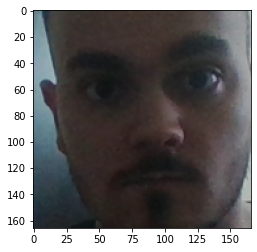

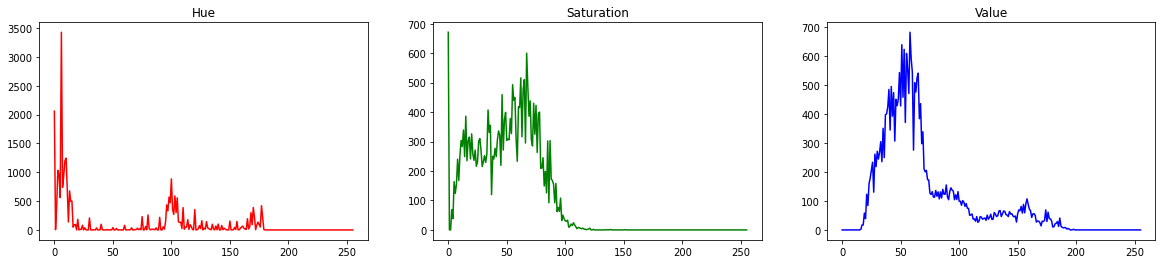

In [38]:
cap = cv.VideoCapture(0)

faces = None
face_cascade = cv.CascadeClassifier('haarcascade_face.xml')

while True:
    _, frame = cap.read()
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    rgb = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

    faces = face_cascade.detectMultiScale(gray)
    
    if len(faces) == 0:
        continue
    else:
        for (x, y, w, h) in faces:
            cv.rectangle(rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)
            face_region = rgb[y+2:y+h-2, x+2:x+w-2]
        break

plt.imshow(face_region)

hsv = cv.cvtColor(face_region, cv.COLOR_RGB2HSV)
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

for i in range(3):
    hist = cv.calcHist([hsv], [i], None, [256], [0, 256])
    axs[i].plot(hist, 'rgb'[i])
    axs[i].set_title(('Hue', 'Saturation', 'Value')[i])

cap.release()

In [71]:
cap = cv.VideoCapture(0)

while True:
    _, frame = cap.read()
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    ycrcb = cv.cvtColor(frame, cv.COLOR_BGR2YCrCb)

    lower_hsv = np.array([0, 35, 30], dtype='uint8')
    upper_hsv = np.array([50, 255, 100], dtype='uint8')
    lower_ycrcb = np.array([0, 133, 77], dtype='uint8')
    upper_ycrcb = np.array([255, 173, 127], dtype='uint8')

    hsv_skin_mask = cv.inRange(hsv, lower_hsv, upper_hsv)
    ycrcb_skin_mask = cv.inRange(ycrcb, lower_ycrcb, upper_ycrcb)

    # cv.imshow('hsv', hsv_skin_mask)
    # cv.imshow('ycrcb', ycrcb_skin_mask)
    
    skin_mask = cv.bitwise_and(hsv_skin_mask, hsv_skin_mask, mask=ycrcb_skin_mask)
    kernel = np.ones((2, 2), dtype='uint8')

    skin_mask = cv.morphologyEx(skin_mask, cv.MORPH_CLOSE, kernel, iterations=2)
    skin_mask = cv.erode(skin_mask, kernel, iterations=2)
    skin_mask = cv.dilate(skin_mask, kernel, iterations=2)

    cv.rectangle(skin_mask, (x, y), (x+w, y+h), (0, 0, 0), -1)

    cv.imshow('skin mask', skin_mask)

    if cv.waitKey(1) == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

In [16]:
def nothing(x):
    pass

cap = cv.VideoCapture(0)

cv.namedWindow('thresh')
cv.createTrackbar('H min', 'thresh', 0, 255, nothing)
cv.createTrackbar('H max', 'thresh', 0, 255, nothing)
cv.createTrackbar('S min', 'thresh', 0, 255, nothing)
cv.createTrackbar('S max', 'thresh', 0, 255, nothing)
cv.createTrackbar('V min', 'thresh', 0, 255, nothing)
cv.createTrackbar('V max', 'thresh', 0, 255, nothing)

while True:
    _, frame = cap.read()
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

    hmin = cv.getTrackbarPos('H min', 'thresh')
    hmax = cv.getTrackbarPos('H max', 'thresh')
    smin = cv.getTrackbarPos('S min', 'thresh')
    smax = cv.getTrackbarPos('S max', 'thresh')
    vmin = cv.getTrackbarPos('V min', 'thresh')
    vmax = cv.getTrackbarPos('V max', 'thresh')

    lower = np.array([hmin, smin, vmin], dtype='uint8')
    upper = np.array([hmax, smax, vmax], dtype='uint8')

    hsv_skin_mask = cv.inRange(hsv, lower, upper)

    cv.imshow('thresh', hsv_skin_mask)
    cv.imshow('frame', frame)

    if cv.waitKey(1) == ord('q'):
        break

cap.release()
cv.destroyAllWindows()